**import libraries**

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import class_weight, shuffle
from sklearn.model_selection import train_test_split
import shutil
import cv2
import tensorflow as tf
import seaborn as sns
%matplotlib inline
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

**declare some variables**

In [3]:
split_ratio = 0.2
img_size = 224
inp_size = (224,224,3)
batch_size = 64
epoches = 100
seed = 42

**read files**

In [4]:
label_data = pd.read_csv('train.csv')

In [35]:
def check_data():
    print("Total data present =",len(label_data))
    return label_data.head(10)

In [36]:
check_data()

Total data present = 3662


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
5,0083ee8054ee,4
6,0097f532ac9f,0
7,00a8624548a9,2
8,00b74780d31d,2
9,00cb6555d108,1


**describe data**

In [9]:
def decribe_data():
  return label_data.describe()

In [10]:
decribe_data()

,diagnosis
count,3662.000000
mean,1.126980
std,1.298409
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


**check image in each category**

In [17]:
def image_category():
    total_category_level = label_data['diagnosis'].value_counts()
    return total_category_level

In [18]:
image_category()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

**plot graph**

In [12]:
def plot_graph(category):
    label = ['NO DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
    #   c = ['orange', 'blue','red','green','purple']
    label_category = list(category)
    plt.bar(label, label_category, alpha=0.8)
    plt.savefig("label.png")
    plt.show()

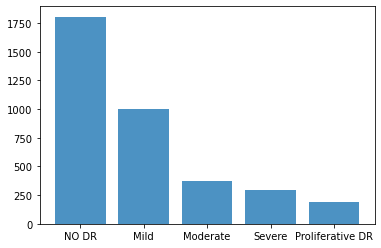

In [13]:
plot_graph(image_category())

**healthy and unhealthy eye comparasion**

In [21]:
def total_healthy_unhealhty_eye():
    healthy_eye =  [ i for i in label_data.diagnosis if i == 0]
    unhealthy_eye =  [ i for i in label_data.diagnosis if i != 0]

    eye_data = [len(healthy_eye), len(unhealthy_eye)]
    return eye_data

In [22]:
total_healthy_unhealhty_eye()

[1805, 1857]

In [29]:
def plot_unhealthy_eye_graph(data):
    fig1, ax1 = plt.subplots()
    labels = 'healthy eye', 'Unhealthy eye',

    ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.savefig("unhealthy_left_right_eye_comparasion.png")
    plt.show()

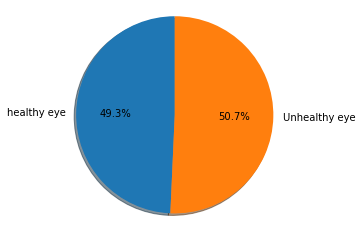

In [30]:
plot_unhealthy_eye_graph(total_healthy_unhealhty_eye())

### image analysis 

**eye label base on diesease**

In [39]:
label = label_data['diagnosis'].unique()
label

array([2, 4, 1, 0, 3], dtype=int64)

**import image files**

In [ ]:
img_dir = os.listdir('F:/diabetic_reitinopathy_image/train_images/')

In [74]:
print("Total image : ", len(img_dir))

Total image :  3662


In [52]:
img_dir

['000c1434d8d7.png',
 '001639a390f0.png',
 '0024cdab0c1e.png',
 '002c21358ce6.png',
 '005b95c28852.png',
 '0083ee8054ee.png',
 '0097f532ac9f.png',
 '00a8624548a9.png',
 '00b74780d31d.png',
 '00cb6555d108.png',
 '00cc2b75cddd.png',
 '00e4ddff966a.png',
 '00f6c1be5a33.png',
 '0104b032c141.png',
 '0124dffecf29.png',
 '0125fbd2e791.png',
 '012a242ac6ff.png',
 '014508ccb9cb.png',
 '0151781fe50b.png',
 '0161338f53cc.png',
 '0180bfa26c0b.png',
 '0182152c50de.png',
 '01b3aed3ed4c.png',
 '01c7808d901d.png',
 '01d9477b1171.png',
 '01eb826f6467.png',
 '01f7bb8be950.png',
 '0212dd31f623.png',
 '022f820027b8.png',
 '0231642cf1c2.png',
 '0232dfea7547.png',
 '02358b47ea89.png',
 '0243404e8a00.png',
 '025a169a0bb0.png',
 '02685f13cefd.png',
 '026dcd9af143.png',
 '02cd34a85b24.png',
 '02da652c74b8.png',
 '02dda30d3acf.png',
 '0304bedad8fe.png',
 '0318598cfd16.png',
 '032d7b0b4bf6.png',
 '033f2b43de6d.png',
 '034cb07a550f.png',
 '03676c71ed1b.png',
 '0369f3efe69b.png',
 '03747397839f.png',
 '03a7f4a5786

**image dimension and shapes**

In [72]:
im_label = []
im_image = []

def image_processing(img):
    global im_label, im_image

    for file in img_dir:
        # for labeling
        # it gives full image name like 12590_left.jpg
        base = os.path.basename("F:/diabetic_reitinopathy_image/train_images/" + file)
        # it give us image name removing .jpg like 12590_left
        fileName = os.path.splitext(base)[0]
        # what it gives the level like 0, 1, 2, 3, 4
        lavel = label_data.loc[label_data.id_code==fileName, 'diagnosis'].values[0]
        im_label.append(np.array(lavel))
        # # for image
        im = Image.open("F:/diabetic_reitinopathy_image/train_images/" + file)
        img = np.array(im.resize((img_size,img_size)))
        im_image.append(img)
    
    #convert into array
    im_label = np.array(im_label)
    im_image = np.array(im_image)

    #shape of array
    print("Dimension of image array  : " ,im_image.ndim)
    print("Shape of image array : ", im_image.shape)
    print("Dimension of label  : ",im_label.ndim)
    print("Shape of label : ",im_label.shape)

In [73]:
%%time
image_processing(img_dir)

Dimension of image array  :  4
Shape of image array :  (3662, 224, 224, 3)
Dimension of label  :  1
Shape of label :  (3662,)
Wall time: 11min 26s


**image in array form**

In [75]:
def array_image():
    for l,m in zip(im_label, im_image):
        print("Label : ",l,"\n")
        print(m,"\n")

In [76]:
array_image()

Label :  2 

[[[3 1 2]
  [3 1 2]
  [2 2 2]
  ...
  [2 1 2]
  [2 0 1]
  [3 1 2]]

 [[3 1 2]
  [2 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [2 0 1]
  [3 0 1]]

 [[2 2 2]
  [1 2 2]
  [2 0 1]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 ...

 [[2 2 2]
  [1 1 1]
  [2 2 2]
  ...
  [2 2 2]
  [1 1 1]
  [2 2 2]]

 [[1 1 1]
  [2 2 2]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[3 1 2]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [1 1 1]
  [2 2 2]]] 

Label :  4 

[[[3 1 2]
  [2 0 1]
  [3 1 2]
  ...
  [3 1 2]
  [2 0 1]
  [1 1 1]]

 [[2 1 2]
  [2 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [2 0 1]
  [2 1 1]]

 [[1 2 1]
  [2 2 2]
  [2 0 1]
  ...
  [2 0 1]
  [3 1 2]
  [3 1 2]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [2 1 2]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]
  [1 1 1]
  ...
  [2 2 2]
  [2 1 2]
  [1 1 1]]

 [[2 2 2]
  [1 1 1]
  [2 1 2]
  ...
  [2 2 2]
  [1 1 1]
  [2 2 2]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [3 2 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 

  [4 4 6]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [1 1 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [1 1 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [1 1 0]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [0 0 0]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]] 

Label :  0 

[[[ 9  8 13]
  [ 9  8 13]
  [ 9  8 13]
  ...
  [10  9 14]
  [10  8 14]
  [10  8 14]]

 [[ 9  8 13]
  [ 9  8 14]
  [

  [2 0 2]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 0 1]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [3 2 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  4 

[[[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 7]
  [4 4 6]]

 [[4 4 6]
  [4 4 7]
  [4 4 7]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [5 3 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 ...

 [[5 4 7]
  [5 5 7]
  [5 5 7]
  ...
  [5 5 7]
  [5 5 8]
  [5 5 8]]

 [[4 4 7]
  [5 5 7]
  [5 5 7]
  ...
  [5 5 7]
  [5 5 7]
  [5 5 7]]

 [[5 4 6]
  [5 4 6]
  [5 5 6]
  ...
  [5 5 7]
  [5 5 7]
  [5 5 7]]] 

Label :  0 

[[[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [2 1 0]
  [1 1 0]
  [1 1 0]]

 [[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [2 1 0]
 

  [2 2 2]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  2 

[[[10  8 13]
  [10  8 14]
  [10  8 14]
  ...
  [10  9 14]
  [10  8 14]
  [10  8 13]]

 [[10  8 14]
  [10  8 14]
  [10  9 14]
  ...
  [11  8 14]
  [10  8 14]
  [10  8 14]]

 [[10  8 14]
  [10  8 14]
  [11  9 14]
  ...
  [11  9 14]
  [10  8 14]
  [10  8 14]]

 ...

 [[11  9 14]
  [11  9 14]
  [11  9 14]
  ...
  [11  9 14]
  [11  9 14]
  [11  9 14]]

 [[10  8 14]
  [10  9 14]
  [11  9 14]
  ...
  [11  9 14]
  [11  9 14]
  [11  9 14]]

 [[11  8 14]
  [11  8 14]
  [11  9 14]
  ...
  [11  9 14]
  [11  9 13]
  [11  9 14]]] 

Label :  0 

[[[2 1 

  [1 1 1]]] 

Label :  0 

[[[4 4 5]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 ...

 [[4 4 7]
  [4 4 7]
  [4 3 7]
  ...
  [4 4 7]
  [4 4 7]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 7]
  [4 3 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 3 7]
  [4 4 6]
  [4 4 6]]] 

Label :  3 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 0 1]]

 [[3 1 2]
  [3 1 2]
  [2 0 1]
  ...
  [2 1 2]
  [2 0 1]
  [2 0 1]]

 [[2 0 1]
  [3 1 2]
  [3 1 2]
  ...
  [1 1 1]
  [3 1 2]
  [3 1 2]]

 ...

 [[2 2 2]
  [3 1 2]
  [3 1 1]
  ...
  [1 0 1]
  [1 1 1]
  [2 2 2]]

 [[1 1 1]
  [2 1 2]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 1 1]
  [3 1 2]
  [3 1 2]
  ...
  [1 2 2]
  [1 1 1]
  [1 1 1]]] 

Label :  2 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
 


Label :  4 

[[[3 1 2]
  [3 1 2]
  [2 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 1 2]
  [3 1 2]
  [2 1 1]
  ...
  [1 1 1]
  [2 1 1]
  [2 2 2]]

 [[2 1 2]
  [2 1 2]
  [1 1 1]
  ...
  [1 1 1]
  [2 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[2 2 2]
  [1 1 1]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 1 2]
  [2 2 2]
  [1 1 1]
  ...
  [2 2 2]
  [2 1 1]
  [3 1 2]]] 

Label :  2 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3

  [0 0 0]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [2 0 1]
  [2 0 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [2 0 1]
  [2 0 1]]

 [[1 1 1]
  [2 2 2]
  [3 3 3]
  ...
  [1 1 1]
  [2 0 1]
  [2 0 1]]

 ...

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[4 3 1]
  [4 3 1]
  [3 2 0]
  ...
  [4 2 0]
  [6 1 1]
  [5 1 1]]

 [[2 1 0]
  [2 1 0]
  [3 2 0]
  ...
  [3 2 0]
  [1 2 0]
  [1 2 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [3 1 0]
  [2 1 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]] 

Label :  2 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
 

  [2 2 2]]] 

Label :  2 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 1 1]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [2 0 1]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[2 0 1]
  [3 1 2]
  [3 1 2]
  ...
  [3 0 1]
  [3 1 2]
  [3 1 2]]

 ...

 [[2 2 2]
  [1 1 1]
  [2 1 1]
  ...
  [2 2 2]
  [3 0 1]
  [2 1 1]]

 [[2 0 1]
  [2 2 2]
  [2 2 2]
  ...
  [2 1 2]
  [2 0 1]
  [3 1 2]]

 [[2 0 1]
  [3 1 2]
  [2 1 2]
  ...
  [1 1 1]
  [3 1 2]
  [3 1 2]]] 

Label :  2 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [3 2 2]
  [3 1 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[1 1 1]
  [1 1 1]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [2 2 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [1 1 1]]] 

Label :  0 

[[[4 4 6]
  [4 4 7]
  [4 4 6]
  ...
  [5 4 6]
  [5 4 7]
  [4 4 6]]

 [[4 4 7]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
 

  [0 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  2 

[[[2 0 2]
  [1 0 1]
  [2 0 2]
  ...
  [1 0 1]
  [1 0 1]
  [2 0 2]]

 [[1 0 1]
  [1 0 1]
  [2 0 2]
  ...
  [2 0 2]
  [1 0 1]
  [1 0 1]]

 [[1 0 1]
  [2 0 2]
  [2 0 2]
  ...
  [1 0 1]
  [1 0 1]
  [1 0 1]]

 ...

 [[2 0 2]
  [1 0 1]
  [2 0 2]
  ...
  [2 0 2]
  [1 0 1]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]

 [[2 0 2]
  [1 0 1]
  [1 0 1]
  ...
  [2 0 2]
  [2 0 2]
  [1 0 1]]] 

Label :  0 

[[[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [1 1 0]
  [2 1 0]
  [2 1 0]]

 [[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [1 1 0]
 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[3 1 2]
  [2 0 1]
  [3 1 2]
  ...
  [1 1 1]
  [2 2 2]
  [3 1 2]]

 [[2 2 2]
  [3 2 2]
  [3 1 2]
  ...
  [2 2 2]
  [1 1 1]
  [2 2 2]]

 ...

 [[1 1 1]
  [2 2 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 [[1 1 1]
  [2 2 2]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [1 1 1]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 2 2]
  [2 2 2]]

 [[3 1

[[[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[2 1 1]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 0 1]]

 [[2 1 1]
  [3 1 2]
  [3 1 2]
  ...
  [2 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [1 1 1]
  ...
  [2 2 2]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]

 [[1 1 1]
  [2 2 2]
  [1 1 1]
  ...
  [2 2 2]
  [1 1 1]
  [2 2 2]]] 

Label :  0 

[[[ 9  8 13]
  [ 9  8 13]
  [ 9  8 13]
  ...
  [ 9  8 13]
  [ 9  8 13]
  [ 9  8 13]]

 [[ 9  8 13]
  [ 9  8 13]
  [ 9  8 14]
  ...
  [ 9  8 13]
  [ 9  8 13]
  [ 9  8 13]]

 [[ 9  8 13]
  [ 9  8 13]
  [ 9  8 13]
  ...
  [ 9  8 14]
  [ 9  8 14]
  [ 9  8 13]]

 ...

 [[10  8 14]
  [10  9 14]
  [10  8 14]
  ...
  [10  9 14]
  [10  8 14]
  [10  8 14]]

 [[10  8 14]
  [10  8 14]
  [10  9 14]
  ...
  [10  9 14]
  [10  8 14]
  [10  8 14]]

 [[ 9  8 13]
  [10  9 14]
  [10  9 14]
  ...
  [10  9 14]
  [10  9 14]
  [10  8 14]]] 

Label :  2 

[[[2 0 1]
  [2 0 1]
  [2 0 1]
  ..

[[[ 9  8 13]
  [ 9  8 13]
  [10  8 14]
  ...
  [ 9  8 13]
  [ 9  7 13]
  [ 9  8 13]]

 [[ 9  8 13]
  [10  8 13]
  [10  8 14]
  ...
  [ 9  8 13]
  [ 9  8 13]
  [ 9  8 13]]

 [[ 9  8 13]
  [ 9  8 13]
  [ 9  8 14]
  ...
  [10  8 13]
  [10  8 13]
  [ 9  8 14]]

 ...

 [[10  8 13]
  [10  8 13]
  [10  8 14]
  ...
  [10  8 14]
  [ 9  8 13]
  [ 9  8 13]]

 [[10  8 13]
  [ 9  8 14]
  [10  8 14]
  ...
  [10  8 14]
  [ 9  8 13]
  [ 9  8 13]]

 [[ 9  8 13]
  [ 9  8 13]
  [ 9  8 14]
  ...
  [10  8 13]
  [ 9  8 14]
  [ 9  8 13]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [4 3 1]
  [3 1 2]
  [2 1 1]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [1 0 0]
  [1 0 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [2 0 1]
  [2 0 1]]

 ...

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  1 

[[[1 1 0]
  [2 1 0]
  [4 0 0]
  ...
  [2 1 1]
  [6 1 1]
  [6 1 1]]

 [[1 1 0]
  [2 1 0]
  [4 0 0]
  ...
  [1 1 1]
  [3 1 0]
  [3 1 0]]

 [[1 1 0]
  [2 1 0]
  [5 1 0]
  ...
  [1 1 1]
  [1 1 0]
  [1 1 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[3 2 0]
  [3 2 0]
  [2 1 0]
  ...
  [2 2 0]
  [2 1 0]
  [2 1 0]]

 [[3 2 0]
  [3 2 0]
  [2 1 0]
  ...
  [1 1 0]
  [2 1 0]
  [2 1 0]]

 [[3 2

[[[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 ...

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [1 1 1]
  [2 0 1]
  [2 0 1]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [1 1 1]
  [2 0 1]
  [2 0 1]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [1 1 1]
  [2 0 1]
  [2 0 1]]] 

Label :  1 

[[[10  5  2]
  [ 9  5  3]
  [ 9  5  4]
  ...
  [10  5  2]
  [10  5  2]
  [ 9  4  2]]

 [[10  5  2]
  [10  5  3]
  [10  5  2]
  ...
  [10  5  2]
  [10  5  2]
  [ 9  3  3]]

 [[ 9  5  2]
  [10  5  2]
  [10  5  2]
  ...
  [ 9  5  2]
  [ 9  5  3]
  [ 9  4  2]]

 ...

 [[ 9  5  3]
  [10  5  3]
  [11  5  3]
  ...
  [ 9  5  2]
  [ 9  5  2]
  [ 9  4  2]]

 [[ 9  5  2]
  [ 9  5  2]
  [10  5  2]
  ...
  [ 9  5  2]
  [ 8  5  2]
  [ 9  4  3]]

 [[ 9  5  2]
  [ 9  5  3]
  [ 9  5  3]
  ...
  [10  5  3]
  [ 9  5  2]
  [ 9  4  3]]] 

Label :  2 

[[[4 1 3]
  [3 1 3]
  [3 1 3]
  ..

[[[10  8 14]
  [11  9 14]
  [11  9 15]
  ...
  [11  9 14]
  [10  9 14]
  [10  8 13]]

 [[10  8 14]
  [11  9 14]
  [11  9 14]
  ...
  [10  9 14]
  [10  9 13]
  [10  8 14]]

 [[11  9 14]
  [11  9 14]
  [11  9 14]
  ...
  [11  9 14]
  [11  9 14]
  [10  9 14]]

 ...

 [[11  9 14]
  [11  9 14]
  [11  9 14]
  ...
  [11  9 14]
  [10  8 14]
  [10  8 14]]

 [[11  9 14]
  [11  9 14]
  [10  9 14]
  ...
  [11  9 14]
  [11  9 14]
  [10  9 14]]

 [[11  8 15]
  [11  9 14]
  [11  9 14]
  ...
  [11  9 14]
  [10  9 14]
  [10  8 14]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ..

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [4 0 1]
  [4 0 0]
  [5 1 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 0 1]
  [0 2 0]
  [1 2 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [3 1 0]
  [3 1 0]]

 ...

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  2 

[[[3 1 2]
  [2 2 2]
  [2 1 2]
  ...
  [3 0 1]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [2 1 1]
  [2 0 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 0 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[2 0 1]
  [2 1 2]
  [2 1 2]
  ...
  [2 1 2]
  [2 1 2]
  [2 1 1]]

 [[3 1 2]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [3 1 2]
  [2 0 1]]

 [[2 0 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [1 1 1]
  [2 0 1]]] 

Label :  2 

[[[3 1 2]
  [2 2 2]
  [2 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [2 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1

[[[ 9  8 13]
  [ 9  7 13]
  [ 9  8 13]
  ...
  [ 9  8 13]
  [ 9  7 13]
  [ 9  7 13]]

 [[ 9  8 13]
  [ 9  8 13]
  [ 9  8 13]
  ...
  [ 9  8 13]
  [ 9  8 13]
  [ 9  8 13]]

 [[ 9  8 13]
  [ 9  8 13]
  [ 9  8 14]
  ...
  [ 9  8 13]
  [ 9  8 13]
  [ 9  8 13]]

 ...

 [[10  8 13]
  [ 9  8 14]
  [10  8 13]
  ...
  [ 9  8 13]
  [ 9  8 13]
  [10  8 13]]

 [[ 9  8 13]
  [ 9  8 13]
  [ 9  8 13]
  ...
  [ 9  8 13]
  [ 9  7 13]
  [ 9  8 13]]

 [[ 9  8 13]
  [ 9  8 13]
  [ 9  8 14]
  ...
  [ 9  8 14]
  [ 9  8 13]
  [ 9  8 13]]] 

Label :  2 

[[[1 1 1]
  [2 2 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 2 2]]

 [[2 2 2]
  [2 1 1]
  [2 1 1]
  ...
  [2 1 2]
  [3 1 2]
  [2 2 2]]

 [[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[2 1 2]
  [2 2 2]
  [2 1 1]
  ...
  [2 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 0 1]
  [1 1 1]
  [1 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [2 0 1]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ..

Label :  3 

[[[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 ...

 [[4 4 6]
  [4 4 7]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 7]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]] 

Label :  1 

[[[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [1 1 0]
  [2 1 0]
  [2 1 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [1 1 0]
  [2 1 0]
  [2 1 0]]

 [[4 0 0]
  [5 0 0]
  [5 1 1]
  ...
  [1 1 0]
  [2 1 0]
  [2 1 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  3 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[2 2 2]
  [1 1 1]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [1 1 1]
  ...
  [2 2 2]
  [1 2 2]
  [2 2 2]]] 

Label :  3 

[[[2 2 2]
  [3 1 2]
  [2 1 2]
  ...
  [2 1 2]
  [2 2 2]
  [2 1 1]]

 [[2 2 2]
  [3 1 2]
  [2 1 2]
  ...
  [3 1 2]
  [2 1 2]
  [2 1 1]]

 [[1 1

  [0 0 0]]] 

Label :  0 

[[[1 0 0]
  [1 0 0]
  [4 2 1]
  ...
  [2 1 0]
  [2 1 0]
  [3 2 0]]

 [[3 2 0]
  [3 2 0]
  [3 2 1]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 ...

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  2 

[[[4 0 3]
  [3 1 3]
  [2 0 2]
  ...
  [3 0 4]
  [4 1 3]
  [3 1 2]]

 [[3 1 3]
  [3 1 3]
  [3 1 3]
  ...
  [3 1 2]
  [3 0 2]
  [3 0 2]]

 [[3 1 3]
  [3 0 3]
  [3 0 2]
  ...
  [3 0 2]
  [2 0 2]
  [3 0 2]]

 ...

 [[2 0 2]
  [3 0 2]
  [3 0 2]
  ...
  [3 0 2]
  [3 0 2]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [3 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [3 0 2]
  ...
  [3 1 2]
  [2 0 2]
  [3 0 2]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
 

[[[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [2 1 1]
  [6 0 0]
  [6 0 0]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [1 1 1]
  [4 1 0]
  [3 1 0]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [1 1 1]
  [1 1 0]
  [1 1 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]] 

Label :  2 

[[[1 1 1]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [1 1 1]
  [2 2 2]]

 [[2 2 2]
  [2 1 1]
  [3 1 2]
  ...
  [3 1 2]
  [2 1 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [1 1 1]
  [2 2 2]]

 [[2 2 2]
  [1 1 1]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [1 1 1]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]] 

Label :  0 

[[[3 2 0]
  [3 2 0]
  [2 1 0]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 [[3 2 0]
  [3 2 0]
  [2 1 0]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 [[2 1

  [4 4 7]]] 

Label :  0 

[[[2 2 2]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 [[2 2 2]
  [0 0 0]
  [1 1 1]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]] 

Label :  2 

[[[3 1 2]
  [2 1 2]
  [2 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 1 2]
  [2 1 1]
  [2 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[3 1 2]
  [3 1 2]
  [1 2 2]
  ...
  [2 2 2]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [2 0 1]
  [2 1 2]
  ...
  [1 2 2]
  [1 1 1]
  [1 1 1]]] 

Label :  0 

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [2 1 0]
  [3 2 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
 

  [3 1 2]]] 

Label :  0 

[[[7 0 1]
  [3 0 0]
  [0 2 0]
  ...
  [2 2 0]
  [1 1 0]
  [1 1 0]]

 [[4 2 1]
  [2 1 0]
  [2 1 0]
  ...
  [3 2 0]
  [1 1 0]
  [1 1 0]]

 [[0 1 0]
  [2 1 0]
  [5 1 0]
  ...
  [2 1 0]
  [1 1 0]
  [1 1 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]] 

Label :  3 

[[[11  6  3]
  [11  6  3]
  [11  6  3]
  ...
  [ 9  5  2]
  [ 9  5  2]
  [ 9  4  2]]

 [[11  6  3]
  [11  6  3]
  [11  6  3]
  ...
  [ 9  5  4]
  [ 9  5  4]
  [ 8  4  3]]

 [[11  6  3]
  [11  6  3]
  [12  7  4]
  ...
  [ 9  5  3]
  [ 9  5  3]
  [ 9  4  3]]

 ...

 [[10  5  2]
  [10  6  3]
  [ 9  5  2]
  ...
  [ 9  5  4]
  [ 8  4  3]
  [ 8  4  2]]

 [[ 9  5  2]
  [10  6  3]
  [ 9  5  2]
  ...
  [ 9  5  4]
  [ 8  5  4]
  [ 8  4  3]]

 [[ 9  5  2]
  [ 9  5  2]
  [10  6  3]
  ...
  [ 9  5  4]
  [ 8  4  3]
  [ 8  4  2]]] 

Label :  4 

[[[2 0 

[[[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [3 0 1]
  [6 0 0]
  [7 1 1]]

 [[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [2 0 1]
  [4 1 0]
  [4 1 1]]

 [[2 2 0]
  [0 0 0]
  [1 1 0]
  ...
  [2 0 1]
  [1 1 0]
  [1 1 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[3 1 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[3 1 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [3 2 2]
  [3 1 2]]

 [[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  2 

[[[3 0 3]
  [3 1 3]
  [4 1 2]
  ...
  [3 1 2]
  [3 0 2]
  [3 0 2]]

 [[4 1 3]
  [3 0 2]
  [3 0 3]
  ...
  [3 1 2]
  [2 0 2]
  [3 1 3]]

 [[3 1

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  4 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [1 1 1]
  [2 2 2]
  [3 1 2]]

 [[3 1

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[3 1 2]
  [3 1 2]
  [2 0 1]
  ...
  [2 2 2]
  [2 2 2]
  [1 1 1]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [1 1 1]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  3 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0

[[[4 4 7]
  [4 4 6]
  [4 3 7]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 7]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 ...

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 1 2]
  [1 1 1]
  [2 1 1]]

 [[3 1 2]
  [3 1 2]
  [2 1 2]
  ...
  [1 1 1]
  [2 2 2]
  [3 1 2]]

 [[3 1 2]
  [2 2 2]
  [2 1 2]
  ...
  [2 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]] 

Label :  0 

[[[53 31 19]
  [53 31 19]
  [54 31 19]
  ...
  [53 30 18]
  [53 30 18]
  [53 29 19]]

 [[ 1  4 13]
  [ 1  4 13]
  [ 1  4 13]
  ...
  [ 0  3 13

  [0 0 0]]] 

Label :  2 

[[[6 6 7]
  [6 6 7]
  [6 6 7]
  ...
  [6 6 7]
  [6 6 7]
  [6 5 6]]

 [[5 6 6]
  [6 5 7]
  [6 6 7]
  ...
  [6 6 6]
  [6 6 7]
  [6 6 7]]

 [[6 6 7]
  [6 6 6]
  [6 6 7]
  ...
  [6 5 7]
  [6 6 7]
  [6 6 6]]

 ...

 [[6 6 7]
  [6 6 7]
  [6 6 7]
  ...
  [6 6 7]
  [6 5 8]
  [6 6 7]]

 [[6 6 7]
  [6 5 7]
  [6 6 7]
  ...
  [6 6 7]
  [6 6 8]
  [6 5 7]]

 [[6 6 7]
  [6 6 7]
  [6 5 8]
  ...
  [6 6 8]
  [6 6 8]
  [6 6 7]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [1 1 1]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [1 1 1]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]

 ...

 [[2 2 2]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [3 2 0]
  [2 2 0]
  [4 3 1]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 2 0]
 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  2 

[[[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [2 0 2]
  [1 0 1]
  [2 0 2]]

 [[1 0 1]
  [1 0 1]
  [1 0 1]
  ...
  [1 0 1]
  [1 0 1]
  [1 0 1]]

 ...

 [[2 0 2]
  [1 0 1]
  [1 0 1]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [1 0 1]
  ...
  [1 0 1]
  [2 0 2]
  [1 0 1]]

 [[1 0 1]
  [2 0 2]
  [1 0 1]
  ...
  [2 0 2]
  [1 0 1]
  [2 0 2]]] 

Label :  4 

[[[3 1 2]
  [2 0 1]
  [3 1 2]
  ...
  [3 1 2]
  [2 0 1]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 0 1]]

 [[3 1

[[[3 1 3]
  [4 1 3]
  [2 1 3]
  ...
  [4 1 3]
  [3 1 3]
  [3 1 3]]

 [[3 1 2]
  [3 0 2]
  [3 0 2]
  ...
  [4 1 3]
  [3 0 2]
  [3 0 2]]

 [[3 0 2]
  [3 0 2]
  [3 1 3]
  ...
  [3 0 2]
  [3 1 3]
  [2 0 2]]

 ...

 [[2 0 2]
  [3 1 3]
  [3 0 2]
  ...
  [3 0 3]
  [3 0 3]
  [3 1 3]]

 [[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [3 0 2]
  [3 0 2]
  [3 0 2]]

 [[2 0 2]
  [3 0 2]
  [3 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]] 

Label :  3 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [1 0 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 1 0]
  [0 0 3]
  [0 0 4]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 0 0]
  [0 0 1]
  [0 1 1]
  ...
  [0 1 0]
  [0 1 0]
  [0 0 0]]

 [[1 0 1]
  [0 1 0]
  [3 0 0]
  ...
  [0 0 2]
  [0 1 0]
  [2 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 1 0]
  [3 2 1]
  [4 3 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  4 

[[[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [3 0 2]
  [2 0 2]
  [3 0 2]]

 [[2 0 2]
  [2 0 2]
  [3 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]

 [[2 0

  [0 0 0]]] 

Label :  2 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [2 1 2]
  [3 1 1]]

 [[3 1 2]
  [2 0 1]
  [3 1 2]
  ...
  [3 1 3]
  [1 1 1]
  [2 0 1]]

 ...

 [[2 2 2]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [3 1 2]
  [2 1 1]]

 [[2 2 2]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 1]
  [2 0 1]
  [1 1 1]]

 [[1 1 1]
  [3 1 2]
  [2 0 1]
  ...
  [2 1 1]
  [2 0 1]
  [2 1 2]]] 

Label :  2 

[[[3 1 2]
  [2 0 1]
  [1 1 1]
  ...
  [3 1 2]
  [1 1 1]
  [2 2 2]]

 [[2 1 2]
  [2 1 2]
  [1 1 1]
  ...
  [2 1 2]
  [1 1 1]
  [1 1 1]]

 [[3 1 2]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]] 

Label :  4 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 1 1]
  [3 1 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [1 1 1]
 

[[[3 2 0]
  [3 2 0]
  [3 2 0]
  ...
  [1 1 0]
  [2 1 0]
  [2 1 0]]

 [[3 2 0]
  [3 2 0]
  [3 2 0]
  ...
  [1 1 0]
  [2 1 0]
  [2 1 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [1 1 0]
  [2 1 0]
  [2 1 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [1 1 1]
  [0 0 0]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [1 1 1]
  [0 0 0]
  [1 1 1]]] 

Label :  1 

[[[3 1 2]
  [2 2 2]
  [2 2 2]
  ...
  [3 1 2]
  [2 1 2]
  [2 2 2]]

 [[3 1 2]
  [2 1 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[3 1 2]
  [3 2 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [2 1 1]
  [2 2 2]
  ...
  [3 1 2]
  [2 1 1]
  [3 1 2]]

 [[3 1 2]
  [3 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0

[[[3 1 2]
  [3 1 2]
  [2 2 2]
  ...
  [3 1 2]
  [2 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [2 2 2]
  ...
  [3 1 2]
  [2 1 2]
  [2 0 1]]

 [[3 1 2]
  [3 1 2]
  [2 2 2]
  ...
  [3 0 2]
  [2 0 1]
  [3 0 2]]

 ...

 [[2 1 2]
  [1 1 1]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 0 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [2 0 1]
  [1 1 1]
  ...
  [2 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  0 

[[[2 2 2]
  [0 0 0]
  [1 1 1]
  ...
  [2 1 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [0 0 0]
  [1 1 1]
  ...
  [2 1 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [1 1 1]
  [1 1 1]]

 ...

 [[3 3 3]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [2 1 0]
  [3 2 0]]

 [[2 1 0]
  [3 2 0]
  [4 3 1]
  ...
  [2 1 0]
  [2 1 0]
  [3 2 0]]

 [[3 2

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  0 

[[[2 1 0]
  [2 1 0]
  [1 0 0]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 [[2 1 0]
  [2 1 0]
  [3 2 0]
  ...
  [2 1 0]
  [2 1 0]
  [3 2 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [2 1 0]
  [3 2 0]]

 ...

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0

[[[3 2 0]
  [1 0 0]
  [2 1 0]
  ...
  [4 3 1]
  [2 1 0]
  [2 1 0]]

 [[3 2 0]
  [1 0 0]
  [2 1 0]
  ...
  [3 2 0]
  [2 1 0]
  [3 2 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 ...

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  2 

[[[3 1 2]
  [3 1 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [1 1 1]
  ...
  [3 1 2]
  [3 1 2]
  [2 0 1]]

 [[2 0 1]
  [1 2 2]
  [2 2 2]
  ...
  [2 1 2]
  [3 1 2]
  [2 1 1]]

 ...

 [[2 1 2]
  [2 1 1]
  [1 0 1]
  ...
  [2 1 1]
  [2 0 1]
  [2 1 2]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [3 1 2]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]] 

Label :  1 

[[[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]

 [[2 0

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  4 

[[[1 0 1]
  [1 0 1]
  [2 0 2]
  ...
  [1 0 1]
  [2 0 2]
  [1 0 1]]

 [[1 0 1]
  [2 0 2]
  [1 0 1]
  ...
  [1 0 1]
  [1 0 1]
  [2 0 2]]

 [[1 0 1]
  [1 0 1]
  [2 0 2]
  ...
  [1 0 1]
  [1 0 1]
  [2 0 2]]

 ...

 [[1 0 1]
  [1 0 1]
  [2 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [1 0 1]]

 [[2 0 2]
  [2 0 2]
  [1 0 1]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [1 0 1]
  ...
  [1 0 1]
  [2 0 2]
  [1 0 1]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0

  [10  8 14]]] 

Label :  2 

[[[3 0 2]
  [3 1 3]
  [3 0 2]
  ...
  [3 1 3]
  [3 0 2]
  [3 0 2]]

 [[3 1 3]
  [3 1 2]
  [3 1 2]
  ...
  [3 0 2]
  [2 0 2]
  [3 0 2]]

 [[3 1 2]
  [2 0 2]
  [3 0 2]
  ...
  [2 0 2]
  [3 0 2]
  [3 0 3]]

 ...

 [[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [2 0 2]
  [3 0 2]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [3 0 2]
  [3 0 2]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [3 0 2]]] 

Label :  1 

[[[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  2 

[[[3 1 3]
  [3 1 3]
  [3 1 3]
  ...
  [3 0 2]
  [3 1 2]
  [3 0 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 0 2

[[[2 2 2]
  [1 1 1]
  [2 2 2]
  ...
  [3 1 2]
  [2 1 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 2 2]
  [1 1 1]]

 [[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [1 1 1]
  [1 1 1]]] 

Label :  0 

[[[10  8 13]
  [10  8 13]
  [10  8 13]
  ...
  [10  8 13]
  [10  8 13]
  [10  8 13]]

 [[10  8 13]
  [10  8 13]
  [10  8 14]
  ...
  [10  8 14]
  [10  8 14]
  [10  8 14]]

 [[10  8 13]
  [10  8 13]
  [10  8 14]
  ...
  [10  8 14]
  [10  8 14]
  [10  8 14]]

 ...

 [[10  8 13]
  [10  8 14]
  [10  8 14]
  ...
  [10  8 14]
  [10  8 14]
  [10  8 14]]

 [[10  8 14]
  [10  8 14]
  [10  9 14]
  ...
  [10  8 14]
  [10  8 14]
  [10  9 14]]

 [[10  8 14]
  [10  8 14]
  [10  8 14]
  ...
  [10  8 14]
  [10  8 14]
  [10  8 14]]] 

Label :  2 

[[[6 6 7]
  [6 5 7]
  [6 6 6]
  ..

  [0 0 0]]] 

Label :  3 

[[[1 0 1]
  [1 0 1]
  [2 0 2]
  ...
  [1 0 1]
  [2 0 2]
  [1 0 1]]

 [[2 0 2]
  [1 0 1]
  [1 0 1]
  ...
  [1 0 1]
  [1 0 1]
  [1 0 1]]

 [[2 0 2]
  [1 0 1]
  [1 0 1]
  ...
  [1 0 1]
  [2 0 2]
  [1 0 1]]

 ...

 [[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [2 0 2]
  [2 0 2]
  [2 0 2]]

 [[2 0 2]
  [2 0 2]
  [2 0 2]
  ...
  [1 0 1]
  [1 0 1]
  [1 0 1]]] 

Label :  2 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[1 1 1]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[1 1 1]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 2 2]
  [1 1 1]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  3 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[1 1 1]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[1 1 1]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [1 1 1]
  [1 1 1]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  2 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0

  [2 2 2]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
 

[[[3 1 2]
  [1 1 1]
  [2 1 2]
  ...
  [1 1 1]
  [2 2 2]
  [2 2 2]]

 [[3 1 2]
  [2 1 2]
  [3 1 2]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[3 1 2]
  [2 0 1]
  [1 2 1]
  ...
  [2 1 2]
  [2 1 1]
  [2 2 2]]

 ...

 [[2 2 2]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 2]
  [1 1 1]
  [2 2 2]]

 [[1 1 1]
  [1 1 1]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 0 1]
  [2 1 2]
  [1 1 1]
  ...
  [2 1 1]
  [1 1 1]
  [1 1 1]]] 

Label :  0 

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 0 1]
  [1 1 0]
  [1 1 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 0 1]
  [1 1 0]
  [1 1 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 1]
  [1 1 0]
  [1 1 0]]

 ...

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  1 

[[[2 1 0]
  [2 1 0]
  [3 2 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 1 0]
  [2 1 0]
  [1 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 1

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [3 2 0]
  [3 2 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [3 2 0]
  [3 2 0]]

 [[2 1 0]
  [2 1 0]
  [3 2 0]
  ...
  [2 1 0]
  [2 1 0]
  [3 2 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  4 

[[[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[2 2 2]
  [1 1 1]
  [2 2 2]
  ...
  [2 2 2]
  [3 2 2]
  [3 1 2]]

 [[3 1 2]
  [2 2 2]
  [1 1 1]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [1 1 1]
  [1 1 1]]

 [[1 1

[[[3 1 1]
  [1 1 1]
  [2 1 1]
  ...
  [2 0 1]
  [1 1 1]
  [3 1 2]]

 [[3 1 2]
  [2 1 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 1 1]
  [2 0 1]]

 [[2 1 2]
  [3 0 2]
  [3 1 2]
  ...
  [1 1 1]
  [2 1 2]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 1 2]
  [2 2 2]
  [2 0 1]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0

  [1 1 1]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [1 1 1]
  [2 1 0]
  [2 1 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [1 1 1]
 

[[[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 7]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 4 6]]

 ...

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 7]
  [4 4 6]
  [4 4 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 7]
  [5 4 6]
  [5 4 6]]

 [[4 4 7]
  [4 4 6]
  [4 4 6]
  ...
  [5 4 7]
  [5 4 7]
  [4 4 6]]] 

Label :  0 

[[[10  8 13]
  [10  8 14]
  [11  9 14]
  ...
  [10  9 14]
  [10  9 14]
  [10  8 14]]

 [[10  8 14]
  [10  9 14]
  [10  9 15]
  ...
  [10  9 14]
  [10  9 14]
  [10  8 14]]

 [[10  8 14]
  [10  9 14]
  [10  9 14]
  ...
  [11  9 14]
  [10  8 14]
  [10  8 14]]

 ...

 [[11  9 14]
  [11 10 15]
  [11  9 15]
  ...
  [11 10 14]
  [11  9 14]
  [10  9 14]]

 [[11  9 14]
  [11  9 14]
  [11  9 15]
  ...
  [11  9 15]
  [11  9 14]
  [11  9 14]]

 [[11  9 14]
  [11  9 15]
  [12  9 15]
  ...
  [10  9 15]
  [11  9 15]
  [11  9 14]]] 

Label :  0 

[[[2 1 0]
  [2 1 0]
  [1 0 0]
  ..

  [0 0 0]]] 

Label :  2 

[[[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 ...

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]] 

Label :  2 

[[[1 2 1]
  [1 1 1]
  [2 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 0 1]]

 [[2 2 2]
  [2 1 1]
  [2 1 2]
  ...
  [2 1 2]
  [2 1 2]
  [2 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [1 2 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[2 2 2]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [1 1 1]
  [1 0 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [2 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [1 1 0]
  [1 1 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [1 1 0]
  [1 1 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 0]
  [1 1 0]
  [1 1 0]]

 ...

 [[2 2 2]
  [0 0 0]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [0 0 0]
  [1 1 1]]] 

Label :  4 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 1 2]
  [2 2 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 2 2]]

 ...

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[2 0 1]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 1 1]
  [3 1 2]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [2 0 1]
  [2 0 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [2 0 1]
  [2 

  [0 0 0]]] 

Label :  1 

[[[3 1 2]
  [1 1 1]
  [2 1 2]
  ...
  [3 1 2]
  [2 2 2]
  [3 1 2]]

 [[3 1 2]
  [2 1 1]
  [2 1 2]
  ...
  [3 1 2]
  [2 2 2]
  [3 1 2]]

 [[2 0 1]
  [3 1 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[1 1 1]
  [2 1 2]
  [1 1 1]
  ...
  [3 1 2]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [2 2 2]
  ...
  [3 1 2]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [3 1 2]
  [2 2 2]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 [[2 1 0]
  [2 1 0]
  [3 2 1]
  ...
  [1 1 0]
 

  [2 2 2]]] 

Label :  2 

[[[1 0 0]
  [2 1 0]
  [2 1 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 1 0]]

 [[2 1 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 1 0]
  [0 0 0]
  [0 0 0]]

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[1 1 1]
  [4 0 1]
  [2 0 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 2]]

 [[1 0 2]
  [2 0 0]
  [3 0 1]
  ...
  [0 0 1]
  [0 0 0]
  [0 0 0]]

 [[1 1 2]
  [0 3 0]
  [0 0 3]
  ...
  [0 0 2]
  [0 0 1]
  [1 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 0 2]
  [3 1 2]
  [2 1 1]]

 [[2 0 1]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [2 1 2]
  [2 2 2]]

 ...

 [[2 1 1]
  [2 1 1]
  [3 1 2]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 2 2]
  [3 1 2]
  [2 0 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [3 1 2]
  [2 2 2]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  2 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [2 0 1]
  ...
  [2 0 1]
  [3 1 2]
  [2 0 1]]

 [[3 1

  [0 0 0]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[2 2 2]
  [0 0 0]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [1 1 1]]] 

Label :  0 

[[[1 1 1]
  [1 1 1]
  [2 2 2]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [1 0 0]
  [2 1 0]
  [3 2 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 0 0]
  [2 1 0]
  [2 1 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]] 

Label :  0 

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [1 0 0]
  [2 1 0]
  [2 1 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [1 0 0]
 

  [5 4 6]]] 

Label :  2 

[[[1 1 0]
  [1 0 0]
  [1 0 0]
  ...
  [2 1 0]
  [1 0 0]
  [2 1 0]]

 [[0 0 0]
  [1 0 0]
  [2 1 0]
  ...
  [2 1 0]
  [2 1 0]
  [2 1 0]]

 [[1 1 0]
  [2 1 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [2 1 0]]

 ...

 [[1 0 0]
  [0 1 3]
  [3 0 3]
  ...
  [0 1 5]
  [1 0 1]
  [2 0 0]]

 [[2 1 0]
  [0 1 1]
  [2 0 1]
  ...
  [0 1 3]
  [2 0 0]
  [1 0 1]]

 [[1 0 1]
  [4 0 0]
  [0 1 0]
  ...
  [1 0 1]
  [4 0 0]
  [0 1 4]]] 

Label :  2 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [2 2 2]
  [2 1 1]
  ...
  [3 1 2]
  [3 1 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 1 2]
  [1 1 1]
  ...
  [2 1 2]
  [1 0 1]
  [2 1 1]]

 [[1 1 1]
  [3 1 2]
  [1 1 1]
  ...
  [3 1 2]
  [1 2 1]
  [2 2 2]]

 [[3 1 2]
  [3 1 2]
  [2 1 2]
  ...
  [2 2 2]
  [2 1 2]
  [3 1 2]]] 

Label :  0 

[[[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [1 0 0]
  [2 1 0]
  [3 2 0]]

 [[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [2 1 0]
 

[[[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[2 2 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [3 1 2]]

 [[2 2 2]
  [1 1 1]
  [2 2 2]
  ...
  [2 2 2]
  [3 2 2]
  [3 1 2]]

 [[3 1 2]
  [2 2 2]
  [1 1 1]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  0 

[[[1 1 0]
  [1 1 0]
  [1 1 0]
  ...
  [1 0 0]
  [2 1 0]
  [2 1 0]]

 [[2 1 0]
  [2 1 0]
  [3 2 0]
  ...
  [3 2 0]
  [2 1 0]
  [2 1 0]]

 [[3 0 0]
  [6 2 1]
  [7 2 1]
  ...
  [3 2 0]
  [2 1 0]
  [2 1 0]]

 ...

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0

  [0 0 0]]] 

Label :  4 

[[[3 1 2]
  [2 0 1]
  [3 1 2]
  ...
  [3 1 2]
  [2 2 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 1 1]
  [1 1 1]
  [2 1 1]]

 [[2 0 1]
  [2 0 1]
  [2 0 1]
  ...
  [3 0 2]
  [1 1 1]
  [1 1 1]]

 ...

 [[2 2 2]
  [2 2 2]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [2 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [2 2 2]]] 

Label :  2 

[[[2 0 1]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [1 2 1]
  [1 1 1]]

 [[2 0 1]
  [2 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [1 1 1]
  [2 1 1]]

 [[3 1 2]
  [2 1 2]
  [2 1 1]
  ...
  [3 0 2]
  [1 2 1]
  [3 1 2]]

 ...

 [[1 1 1]
  [1 1 1]
  [2 1 2]
  ...
  [2 1 1]
  [1 1 1]
  [2 2 2]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [2 0 1]
  ...
  [2 0 1]
  [2 1 2]
  [1 1 1]]] 

Label :  0 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
 

  [0 0 0]]] 

Label :  2 

[[[2 0 1]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 2 2]
  [2 2 2]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [2 2 2]
  ...
  [2 2 2]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [2 2 2]
  ...
  [2 2 2]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [1 1 1]
  [1 1 1]]] 

Label :  4 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [2 0 1]
  [3 1 2]]

 ...

 [[1 1 1]
  [1 1 1]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [2 2 2]
  [1 1 1]]

 [[2 2 2]
  [1 1 1]
  [1 1 1]
  ...
  [3 1 2]
  [2 1 1]
  [1 1 1]]] 

Label :  0 

[[[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 0 1]
  [2 1 0]
  [2 1 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 0 1]
 

[[[3 2 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [2 0 0]
  [6 1 0]]

 [[3 2 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [1 1 0]
  [3 1 0]]

 [[2 1 0]
  [2 1 0]
  [2 1 0]
  ...
  [2 1 0]
  [0 2 0]
  [1 1 0]]

 ...

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] 

Label :  1 

[[[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [2 2 2]
  [2 2 2]
  ...
  [3 1 2]
  [3 1 2]
  [2 2 2]]

 ...

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [2 0 1]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]

 [[3 1 2]
  [3 1 2]
  [3 1 2]
  ...
  [3 1 2]
  [3 1 2]
  [3 1 2]]] 

Label :  0 

[[[4 4 6]
  [4 4 7]
  [4 4 7]
  ...
  [4 4 7]
  [4 3 7]
  [4 3 6]]

 [[4 4 6]
  [4 4 6]
  [4 4 6]
  ...
  [4 4 6]
  [4 4 6]
  [4 3 6]]

 [[4 4